In [1]:
import numpy as np
from scipy import signal
from scipy.stats import levy_stable
from symulacja_py import impsim
import matplotlib.pyplot as plt

In [3]:
def create_signal(alpha, impulse_amplitude, seed):
    fs = 25000
    fmod = 30
    f_center = 5000
    bandwidth = 1500
    shift = 0

    amp_imp = impulse_amplitude
    alfa = alpha
    skala = 1

    varsize = 1*fs
    tt_ts = np.linspace(1/fs,varsize/fs,varsize)
    #szum = np.random.normal(0,skala,varsize) #szum Gaussowski

    szum = levy_stable.rvs(alfa,0,0,skala,varsize, random_state=seed)  #szum alfa-stabilny

    signal_l = 2*impsim(fs,varsize,fmod,amp_imp,f_center,bandwidth,shift)+szum
    return signal_l

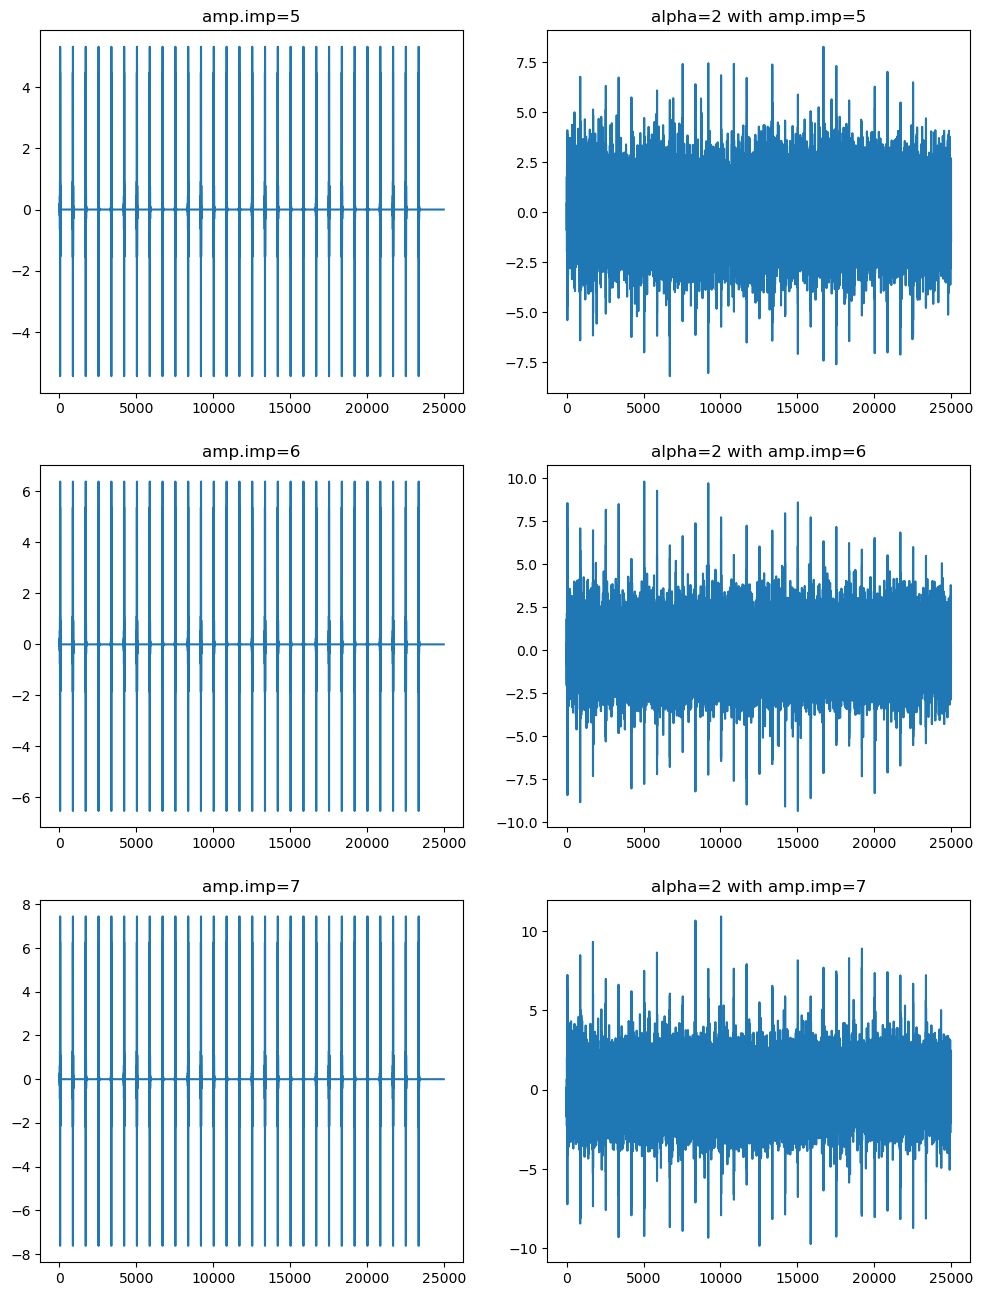

In [8]:
impulse_amplitudes = [5,6,7]
alpha = 2
f,ax = plt.subplots(len(impulse_amplitudes),2, figsize = (12,16))
t = np.arange(0,25000)
for i in range(0,len(impulse_amplitudes)):
    noisy_imp_signal = create_signal(alpha, impulse_amplitudes[i], i)
    pure_noise_signal = create_signal(alpha, 0, i)
    impulse_signal = noisy_imp_signal - pure_noise_signal
    ax[i,0].plot(t, impulse_signal)
    ax[i,0].set_title("amp.imp={}".format(impulse_amplitudes[i]))
    ax[i,1].plot(t, noisy_imp_signal)
    ax[i,1].set_title("alpha=2 with amp.imp={}".format(impulse_amplitudes[i]))

plt.show()

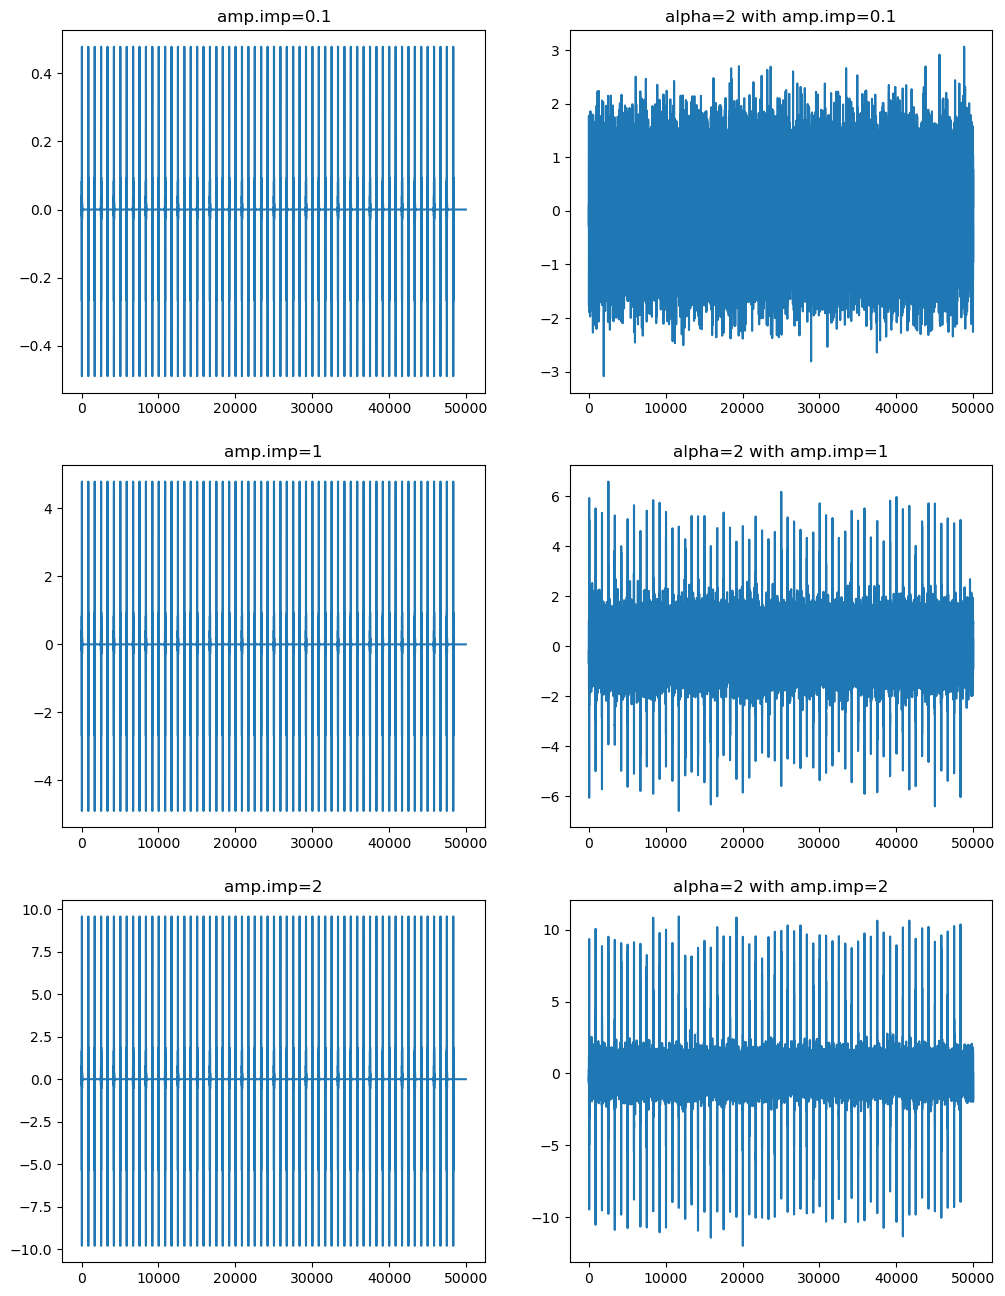

In [13]:
impulse_amplitudes = [0.1,1,2]
alpha = 2
f,ax = plt.subplots(len(impulse_amplitudes),2, figsize = (12,16))
t = np.arange(0,50000)
for i in range(0,len(impulse_amplitudes)):
    noisy_imp_signal = create_signal(alpha, impulse_amplitudes[i], i)
    pure_noise_signal = create_signal(alpha, 0, i)
    impulse_signal = noisy_imp_signal - pure_noise_signal
    ax[i,0].plot(t, impulse_signal)
    ax[i,0].set_title("amp.imp={}".format(impulse_amplitudes[i]))
    ax[i,1].plot(t, noisy_imp_signal)
    ax[i,1].set_title("alpha=2 with amp.imp={}".format(impulse_amplitudes[i]))

plt.show()